In [1]:
# Imported the needed packages
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [2]:
# Loaded in the data
df = pd.read_csv('comp2_raw.csv', index_col=0)
df.head()

X1  X2  X3  X4  X5  X6  X7  X8  X9  X10 ...    X15    X16    X17   X18  \
1   20000   2   2   1  24   2   2  -1  -1   -2 ...      0      0      0     0   
2  120000   2   2   2  26  -1   2   0   0    0 ...   3272   3455   3261     0   
3   90000   2   2   2  34   0   0   0   0    0 ...  14331  14948  15549  1518   
4   50000   2   2   1  37   0   0   0   0    0 ...  28314  28959  29547  2000   
5   50000   1   2   1  57  -1   0  -1   0    0 ...  20940  19146  19131  2000   

     X19    X20   X21   X22   X23  Y  
1    689      0     0     0     0  1  
2   1000   1000  1000     0  2000  1  
3   1500   1000  1000  1000  5000  0  
4   2019   1200  1100  1069  1000  0  
5  36681  10000  9000   689   679  0  

[5 rows x 24 columns]

### Decision Tree ###

In [3]:
# Splitting up our data into variable and target data
X = df.iloc[:, :-1] # Variable
Y = df.Y # Target

In [4]:
# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2019)

In [5]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

In [6]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.7294444444444445


**We got a inital model accuracy of 72.94% which is good; however, we can try and make our model even more accurate.**

In [8]:
# We are going to look at the classification report and also the confusion matrix for our model 
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      7063
           1       0.38      0.43      0.40      1937

   micro avg       0.73      0.73      0.73      9000
   macro avg       0.61      0.62      0.61      9000
weighted avg       0.74      0.73      0.73      9000

[[5741 1322]
 [1113  824]]


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.26045 to fit



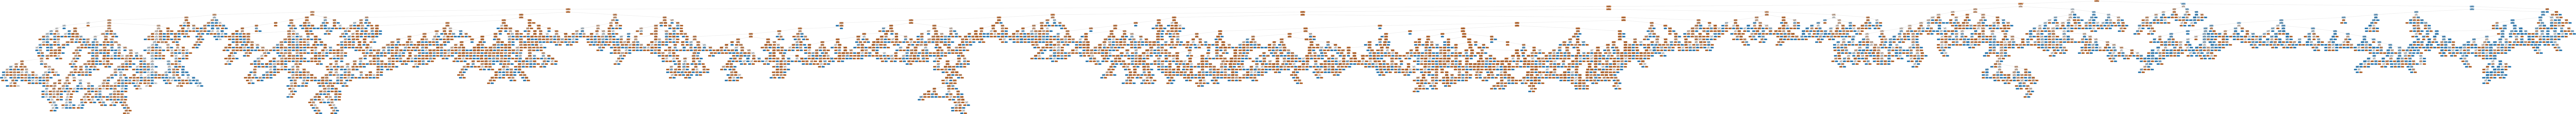

In [9]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Pruning the Decision Tree ##

In [10]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

# We are going to look at the classification report and also the confusion matrix for our model
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

Accuracy: 0.7294444444444445
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      7063
           1       0.38      0.43      0.40      1937

   micro avg       0.73      0.73      0.73      9000
   macro avg       0.61      0.62      0.61      9000
weighted avg       0.74      0.73      0.73      9000

[[5741 1322]
 [1113  824]]


**Suprisingly the pruning of our tree did not make our results better.**

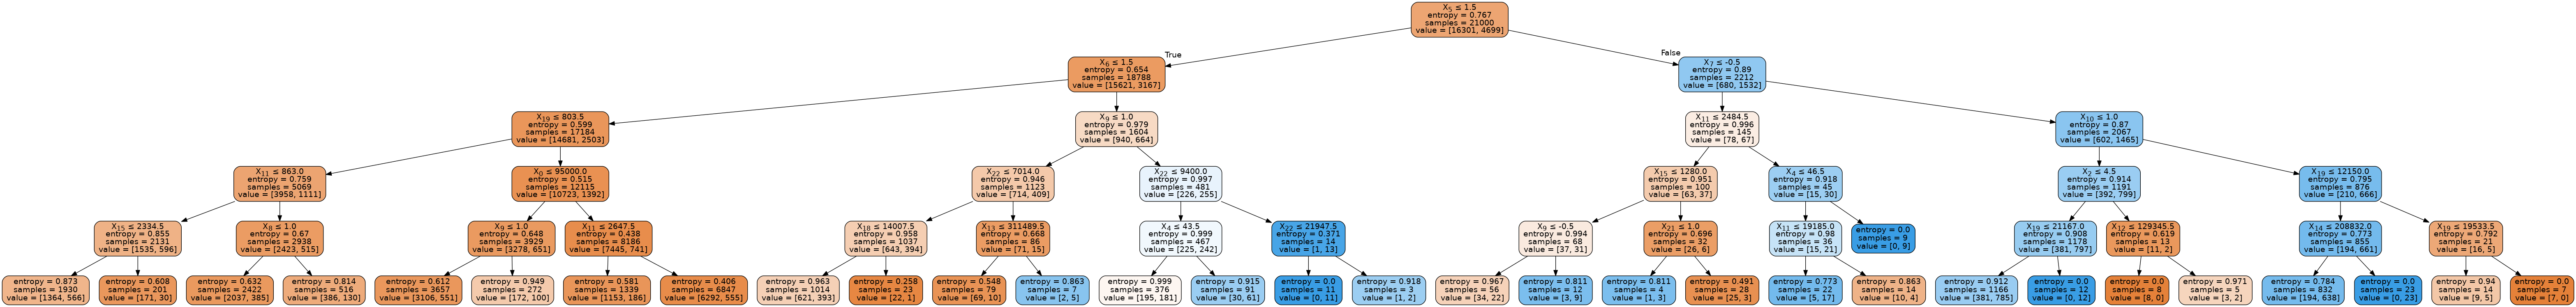

In [11]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Logistic Regression ###

In [12]:
X.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23'],
      dtype='object')

In [19]:
# feature extraction 
for i in range(1, (df.shape[1] + 1 )):
    print(i)
    # create a base classifier used to evaluate a subset of attributes
    model = LogisticRegression()
    # create the RFE model and select 3 attributes
    rfe = RFE(model, i)
    rfe = rfe.fit(X, Y)
    # summarize the selection of the attributes
    print('Model with the best', i, 'features')
    print(dict(zip(df.columns, rfe.ranking_)))

1


/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

Model with the best 1 features
{'X1': 19, 'X2': 4, 'X3': 6, 'X4': 3, 'X5': 9, 'X6': 1, 'X7': 5, 'X8': 2, 'X9': 8, 'X10': 7, 'X11': 10, 'X12': 15, 'X13': 16, 'X14': 21, 'X15': 23, 'X16': 18, 'X17': 22, 'X18': 11, 'X19': 12, 'X20': 14, 'X21': 13, 'X22': 17, 'X23': 20}
2


/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

Model with the best 2 features
{'X1': 18, 'X2': 3, 'X3': 5, 'X4': 2, 'X5': 8, 'X6': 1, 'X7': 4, 'X8': 1, 'X9': 7, 'X10': 6, 'X11': 9, 'X12': 14, 'X13': 15, 'X14': 20, 'X15': 22, 'X16': 17, 'X17': 21, 'X18': 10, 'X19': 11, 'X20': 13, 'X21': 12, 'X22': 16, 'X23': 19}
3


/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

Model with the best 3 features
{'X1': 17, 'X2': 2, 'X3': 4, 'X4': 1, 'X5': 7, 'X6': 1, 'X7': 3, 'X8': 1, 'X9': 6, 'X10': 5, 'X11': 8, 'X12': 13, 'X13': 14, 'X14': 19, 'X15': 21, 'X16': 16, 'X17': 20, 'X18': 9, 'X19': 10, 'X20': 12, 'X21': 11, 'X22': 15, 'X23': 18}
4


/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

Model with the best 4 features
{'X1': 16, 'X2': 1, 'X3': 3, 'X4': 1, 'X5': 6, 'X6': 1, 'X7': 2, 'X8': 1, 'X9': 5, 'X10': 4, 'X11': 7, 'X12': 12, 'X13': 13, 'X14': 18, 'X15': 20, 'X16': 15, 'X17': 19, 'X18': 8, 'X19': 9, 'X20': 11, 'X21': 10, 'X22': 14, 'X23': 17}
5


/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

Model with the best 5 features
{'X1': 15, 'X2': 1, 'X3': 2, 'X4': 1, 'X5': 5, 'X6': 1, 'X7': 1, 'X8': 1, 'X9': 4, 'X10': 3, 'X11': 6, 'X12': 11, 'X13': 12, 'X14': 17, 'X15': 19, 'X16': 14, 'X17': 18, 'X18': 7, 'X19': 8, 'X20': 10, 'X21': 9, 'X22': 13, 'X23': 16}
6


/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

Model with the best 6 features
{'X1': 14, 'X2': 1, 'X3': 1, 'X4': 1, 'X5': 4, 'X6': 1, 'X7': 1, 'X8': 1, 'X9': 3, 'X10': 2, 'X11': 5, 'X12': 10, 'X13': 11, 'X14': 16, 'X15': 18, 'X16': 13, 'X17': 17, 'X18': 6, 'X19': 7, 'X20': 9, 'X21': 8, 'X22': 12, 'X23': 15}
7


/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

Model with the best 7 features
{'X1': 13, 'X2': 1, 'X3': 1, 'X4': 1, 'X5': 3, 'X6': 1, 'X7': 1, 'X8': 1, 'X9': 2, 'X10': 1, 'X11': 4, 'X12': 9, 'X13': 10, 'X14': 15, 'X15': 17, 'X16': 12, 'X17': 16, 'X18': 5, 'X19': 6, 'X20': 8, 'X21': 7, 'X22': 11, 'X23': 14}
8


/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

Model with the best 8 features
{'X1': 12, 'X2': 1, 'X3': 1, 'X4': 1, 'X5': 2, 'X6': 1, 'X7': 1, 'X8': 1, 'X9': 1, 'X10': 1, 'X11': 3, 'X12': 8, 'X13': 9, 'X14': 14, 'X15': 16, 'X16': 11, 'X17': 15, 'X18': 4, 'X19': 5, 'X20': 7, 'X21': 6, 'X22': 10, 'X23': 13}
9


/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

Model with the best 9 features
{'X1': 11, 'X2': 1, 'X3': 1, 'X4': 1, 'X5': 1, 'X6': 1, 'X7': 1, 'X8': 1, 'X9': 1, 'X10': 1, 'X11': 2, 'X12': 7, 'X13': 8, 'X14': 13, 'X15': 15, 'X16': 10, 'X17': 14, 'X18': 3, 'X19': 4, 'X20': 6, 'X21': 5, 'X22': 9, 'X23': 12}
10


/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

Model with the best 10 features
{'X1': 10, 'X2': 1, 'X3': 1, 'X4': 1, 'X5': 1, 'X6': 1, 'X7': 1, 'X8': 1, 'X9': 1, 'X10': 1, 'X11': 1, 'X12': 6, 'X13': 7, 'X14': 12, 'X15': 14, 'X16': 9, 'X17': 13, 'X18': 2, 'X19': 3, 'X20': 5, 'X21': 4, 'X22': 8, 'X23': 11}
11


/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

Model with the best 11 features
{'X1': 9, 'X2': 1, 'X3': 1, 'X4': 1, 'X5': 1, 'X6': 1, 'X7': 1, 'X8': 1, 'X9': 1, 'X10': 1, 'X11': 1, 'X12': 5, 'X13': 6, 'X14': 11, 'X15': 13, 'X16': 8, 'X17': 12, 'X18': 1, 'X19': 2, 'X20': 4, 'X21': 3, 'X22': 7, 'X23': 10}
12


/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

Model with the best 12 features
{'X1': 8, 'X2': 1, 'X3': 1, 'X4': 1, 'X5': 1, 'X6': 1, 'X7': 1, 'X8': 1, 'X9': 1, 'X10': 1, 'X11': 1, 'X12': 4, 'X13': 5, 'X14': 10, 'X15': 12, 'X16': 7, 'X17': 11, 'X18': 1, 'X19': 1, 'X20': 3, 'X21': 2, 'X22': 6, 'X23': 9}
13


/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

Model with the best 13 features
{'X1': 7, 'X2': 1, 'X3': 1, 'X4': 1, 'X5': 1, 'X6': 1, 'X7': 1, 'X8': 1, 'X9': 1, 'X10': 1, 'X11': 1, 'X12': 3, 'X13': 4, 'X14': 9, 'X15': 11, 'X16': 6, 'X17': 10, 'X18': 1, 'X19': 1, 'X20': 2, 'X21': 1, 'X22': 5, 'X23': 8}
14


/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

Model with the best 14 features
{'X1': 6, 'X2': 1, 'X3': 1, 'X4': 1, 'X5': 1, 'X6': 1, 'X7': 1, 'X8': 1, 'X9': 1, 'X10': 1, 'X11': 1, 'X12': 2, 'X13': 3, 'X14': 8, 'X15': 10, 'X16': 5, 'X17': 9, 'X18': 1, 'X19': 1, 'X20': 1, 'X21': 1, 'X22': 4, 'X23': 7}
15


/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

Model with the best 15 features
{'X1': 5, 'X2': 1, 'X3': 1, 'X4': 1, 'X5': 1, 'X6': 1, 'X7': 1, 'X8': 1, 'X9': 1, 'X10': 1, 'X11': 1, 'X12': 1, 'X13': 2, 'X14': 7, 'X15': 9, 'X16': 4, 'X17': 8, 'X18': 1, 'X19': 1, 'X20': 1, 'X21': 1, 'X22': 3, 'X23': 6}
16


/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

Model with the best 16 features
{'X1': 4, 'X2': 1, 'X3': 1, 'X4': 1, 'X5': 1, 'X6': 1, 'X7': 1, 'X8': 1, 'X9': 1, 'X10': 1, 'X11': 1, 'X12': 1, 'X13': 1, 'X14': 6, 'X15': 8, 'X16': 3, 'X17': 7, 'X18': 1, 'X19': 1, 'X20': 1, 'X21': 1, 'X22': 2, 'X23': 5}
17


/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

Model with the best 17 features
{'X1': 3, 'X2': 1, 'X3': 1, 'X4': 1, 'X5': 1, 'X6': 1, 'X7': 1, 'X8': 1, 'X9': 1, 'X10': 1, 'X11': 1, 'X12': 1, 'X13': 1, 'X14': 5, 'X15': 7, 'X16': 2, 'X17': 6, 'X18': 1, 'X19': 1, 'X20': 1, 'X21': 1, 'X22': 1, 'X23': 4}
18


/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

Model with the best 18 features
{'X1': 2, 'X2': 1, 'X3': 1, 'X4': 1, 'X5': 1, 'X6': 1, 'X7': 1, 'X8': 1, 'X9': 1, 'X10': 1, 'X11': 1, 'X12': 1, 'X13': 1, 'X14': 4, 'X15': 6, 'X16': 1, 'X17': 5, 'X18': 1, 'X19': 1, 'X20': 1, 'X21': 1, 'X22': 1, 'X23': 3}
19


/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default so

Model with the best 19 features
{'X1': 1, 'X2': 1, 'X3': 1, 'X4': 1, 'X5': 1, 'X6': 1, 'X7': 1, 'X8': 1, 'X9': 1, 'X10': 1, 'X11': 1, 'X12': 1, 'X13': 1, 'X14': 3, 'X15': 5, 'X16': 1, 'X17': 4, 'X18': 1, 'X19': 1, 'X20': 1, 'X21': 1, 'X22': 1, 'X23': 2}
20


/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model with the best 20 features
{'X1': 1, 'X2': 1, 'X3': 1, 'X4': 1, 'X5': 1, 'X6': 1, 'X7': 1, 'X8': 1, 'X9': 1, 'X10': 1, 'X11': 1, 'X12': 1, 'X13': 1, 'X14': 2, 'X15': 4, 'X16': 1, 'X17': 3, 'X18': 1, 'X19': 1, 'X20': 1, 'X21': 1, 'X22': 1, 'X23': 1}
21


/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model with the best 21 features
{'X1': 1, 'X2': 1, 'X3': 1, 'X4': 1, 'X5': 1, 'X6': 1, 'X7': 1, 'X8': 1, 'X9': 1, 'X10': 1, 'X11': 1, 'X12': 1, 'X13': 1, 'X14': 1, 'X15': 3, 'X16': 1, 'X17': 2, 'X18': 1, 'X19': 1, 'X20': 1, 'X21': 1, 'X22': 1, 'X23': 1}
22


/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model with the best 22 features
{'X1': 1, 'X2': 1, 'X3': 1, 'X4': 1, 'X5': 1, 'X6': 1, 'X7': 1, 'X8': 1, 'X9': 1, 'X10': 1, 'X11': 1, 'X12': 1, 'X13': 1, 'X14': 1, 'X15': 2, 'X16': 1, 'X17': 1, 'X18': 1, 'X19': 1, 'X20': 1, 'X21': 1, 'X22': 1, 'X23': 1}
23


/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model with the best 23 features
{'X1': 1, 'X2': 1, 'X3': 1, 'X4': 1, 'X5': 1, 'X6': 1, 'X7': 1, 'X8': 1, 'X9': 1, 'X10': 1, 'X11': 1, 'X12': 1, 'X13': 1, 'X14': 1, 'X15': 1, 'X16': 1, 'X17': 1, 'X18': 1, 'X19': 1, 'X20': 1, 'X21': 1, 'X22': 1, 'X23': 1}
24


/home/jupyter-kclarke/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model with the best 24 features
{'X1': 1, 'X2': 1, 'X3': 1, 'X4': 1, 'X5': 1, 'X6': 1, 'X7': 1, 'X8': 1, 'X9': 1, 'X10': 1, 'X11': 1, 'X12': 1, 'X13': 1, 'X14': 1, 'X15': 1, 'X16': 1, 'X17': 1, 'X18': 1, 'X19': 1, 'X20': 1, 'X21': 1, 'X22': 1, 'X23': 1}
